In [1]:

###Data taken form the weatherman boardgame prediction github

In [2]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
import os

In [3]:
print(sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
os.chdir('C:/Users/jarves/Desktop/Git')

In [6]:
games = pd.read_csv('games.csv')

In [7]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

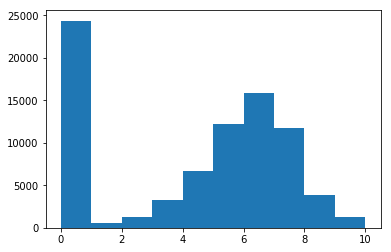

In [8]:
#Plot histogram of all average ratings
plt.hist(games['average_rating'])

In [11]:
#Print the first row of all the games with zero average ratings
#print(games[games['average_rating']==0].iloc[0])

#Print the first row of all the games with ratings > 0 
#print(games[games['average_rating'] > 0].iloc[0])


In [45]:
#Drop all rows with 0 reviews
games = games[games['users_rated'] > 0 ]

#Drop all rows with missing values
games = games.dropna(axis=0)

print(games.shape)

(56894, 20)


(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

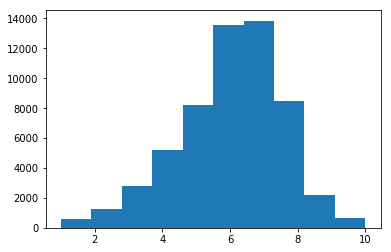

In [46]:
#Plot histogram again of average ratings
plt.hist(games['average_rating'])

In [47]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


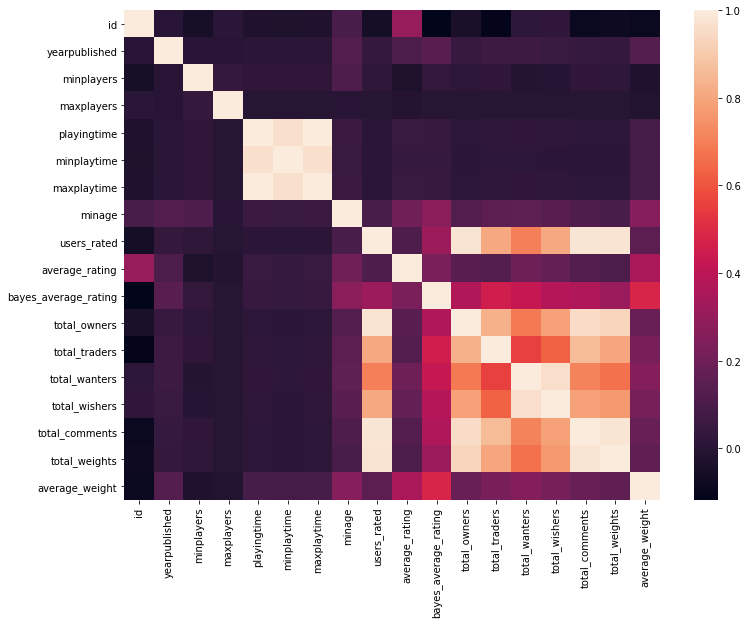

In [48]:
##Correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat)

In [49]:
#Get the columns of the data in a list
columns=games.columns.tolist()

columns1 = [c for c in columns if c not in ['bayes_average_rating','average_rating','id','name','type']]

#Store the variable we will be predicting
target = 'average_rating'
print(columns1)


['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [50]:
#Generate the ttrain and test data
from sklearn.cross_validation import train_test_split

#Generate training set
train = games.sample(frac = 0.8,random_state=1)

#Take anything not in trainins set and put it in test set
test = games.loc[~games.index.isin(train.index)]

#Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(train[columns1],train[target])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
#Generate prediction for each set
prediction = LR.predict(test[columns1])

#Compute error b/w error values and prediction values
mean_squared_error(prediction,test[target])



2.078819032629324

In [59]:
#Import the random forest model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 10,random_state = 10)

#Fit the data
rfr.fit(train[columns1],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [61]:
#Predictions
predict1 = rfr.predict(test[columns1])
mean_squared_error(predict1,test[target])

1.4470476872641838

In [66]:
pred_rfr = rfr.predict(train[columns1].iloc[0].values.reshape(1,-1))
print(pred_rfr)

[7.06837717]
